YU-WEN YANG (Elaine)

Using principal component analysis and histogram/Bayesian concepts for classifier design and evaluation.

In [68]:
# import packages
import struct
import numpy as np
from array import array
import matplotlib.pyplot as plt
import numpy.linalg as LA
from pandas import DataFrame, ExcelWriter

In [69]:
def load_mnist(dataset = "training", selecteddigits = range(10), path = r'/Users/elaineyang//Downloads'):

    #Check training/testing specification. Must be "training" (default) or "testing"
    if dataset == "training":
        fname_digits = path + '/' + 'train-images-idx3-ubyte'
        fname_labels = path + '/' + 'train-labels-idx1-ubyte'
    elif dataset == "testing":
        fname_digits = path + '/' + 't10k-images-idx3-ubyte'
        fname_labels = path + '/' + 't10k-labels-idx1-ubyte'
    else:
        raise ValueError("dataset must be 'testing' or 'training'")
        
        
    #Import digits data
    digitsfileobject = open(fname_digits, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", digitsfileobject.read(16))
    digitsdata = array("B", digitsfileobject.read())
    digitsfileobject.close()
    print('magic_nr, size, rows, cols', magic_nr, size, rows, cols)

    #Import label data
    labelsfileobject = open(fname_labels, 'rb')
    magic_nr, size = struct.unpack(">II", labelsfileobject.read(8))
    labelsdata = array("B",labelsfileobject.read())
    labelsfileobject.close()
    
    #Find indices of selected digits
    indices = [k for k in range(size) if labelsdata[k] in selecteddigits]
    N = len(indices)
    print('N', N)
    
    #Create empty arrays for X and T
    X = np.zeros((N, rows * cols), dtype = np.uint8)
    T = np.zeros((N, 1), dtype = np.uint8)
    
    #Fill X from digitsdata
    #Fill T from labelsdata
    for i in range(N):
        X[i] = digitsdata[indices[i] * rows * cols:(indices[i] + 1) * rows * cols]
        T[i] = labelsdata[indices[i]]
    
    return X,T

In [70]:
def vectortoimg(v, width, show = True):
    
    plt.imshow(v.reshape(width, width), interpolation = 'None', cmap = 'gray')
    plt.axis('off')
    if show:
        plt.show()

In [71]:
def readExcelSheet1(excelfile):
    
    from pandas import read_excel
    
    return (read_excel(excelfile)).values

In [72]:
def readExcelRange(excelfile,sheetname = "Sheet1", startrow = 1, endrow = 1, startcol = 1, endcol = 1):
    
    from pandas import read_excel
    values = (read_excel(excelfile, sheetname, header = None)).values;
    
    return values[startrow-1 : endrow, startcol - 1 : endcol]

In [73]:
def readExcel(excelfile, **args):
    
    if args:
        data = readExcelRange(excelfile, **args)
    else:
        data = readExcelSheet1(excelfile)
    if data.shape == (1, 1):
        return data[0, 0]
    elif (data.shape)[0] == 1:
        return data[0]
    else:
        return data

In [74]:
def writeExcelData(x,excelfile,sheetname,startrow,startcol):
    
    from pandas import DataFrame, ExcelWriter
    from openpyxl import load_workbook
    df = DataFrame(x)
    book = load_workbook(excelfile)
    writer = ExcelWriter(excelfile, engine = 'openpyxl') 
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    df.to_excel(writer, sheet_name = sheetname, startrow = startrow - 1, startcol = startcol - 1, header = False, index = False)
    writer.save()
    writer.close()

In [75]:
def getSheetNames(excelfile):
    
    from pandas import ExcelFile
    
    return (ExcelFile(excelfile)).sheet_names

In [76]:
def accuracy(truth, result):
    """
    Computes accuracy.
    truth = array containing ground truth class labels
    result = array containing classification result class labels
    """
    return (list((truth == result)).count(True)) / np.alen(truth)

# Set file & check sheets

In [77]:
excelfile = r"Assignment_3_ Submission_Template.xlsx"
sheets = getSheetNames(excelfile)

In [78]:
# Set two numbers
[label_n, label_p] = [4, 6]

# Check Data Set

In [79]:
X, T = load_mnist(dataset = "training", selecteddigits = [label_n, label_p])

magic_nr, size, rows, cols 2051 60000 28 28
N 11760


In [80]:
print("Checking shape of matrix: ", X.shape)
print("Checking min/max values: ",(np.amin(X),np.amax(X)))
print("Checking unique labels in T: ",list(np.unique(T)))


Checking shape of matrix:  (11760, 784)
Checking min/max values:  (0, 255)
Checking unique labels in T:  [4, 6]


Checking one training vector by plotting image: 


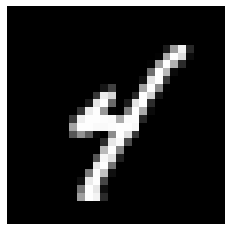

In [81]:
print("Checking one training vector by plotting image: ")
vectortoimg(X[-20], 28)

Checking multiple training vectors by plotting images.
Be patient:


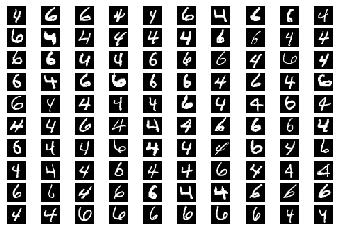

In [82]:
print("Checking multiple training vectors by plotting images.\nBe patient:")
plt.close('all')

fig = plt.figure()

nrows = 10
ncols = 10
for row in range(nrows):
    for col in range(ncols):
        plt.subplot(nrows, ncols, row * ncols + col + 1)
        vectortoimg(X[np.random.randint(len(T))], 28, show = False)
plt.show()

# XZCVPR Process

In [83]:
X = np.array(X, np.float64)

# Get mean vector 784 features
mu = np.mean(X, axis = 0)
# Get
Z = X - mu
# Get covariance matrix
C = np.cov(Z, rowvar = False)
# λ is vector of eigenvalues, V is matrix of eigenvectors
[λ, V] = LA.eigh(C)

row = V[-1, :]
col = V[:, -1]

print('X:\n', X)
print('mu:\n', mu)
print('mu.shape:\n', mu.shape )
print('Z:\n', Z)
print('C:\n', C)
print('[λ, V]:\n', [λ, V])
print('row:\n', row)
print('col:\n', col)

X:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
mu:
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.86394558e-03 2.15986395e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.36054422e-03 4.67687075e-03 4.73639456e-02 1.22534014e-01
 1.99319728e-01 2.96768707e-01 5.61224490e-01 7.48384354e-01
 8.33673469e-01 8.48724490e-01 8.46598639e-01 7.43027211e-01
 7.56292517e-01 7.01615646e-01 5.04676871e-01 3.63435374e-01
 2.74574830e-01 1.09013605e-01 5.14455782e-02 1.80272109e-02
 0.00000000e+00 0.00000000e+00 0.00000000e

In [84]:
# If the matrix product C.row is the same as λ[-1]*row, this should evaluate to [0,0,0]
np.dot(C, row) - (λ[-1] * row) 

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -6.03211435e-03, -1.32082504e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -8.32015773e-04, -2.86005422e-03, -2.89645491e-02, -7.49334205e-02,
       -1.21890311e-01, -1.81483440e-01, -3.43206506e-01, -4.57660676e-01,
       -5.09817665e-01, -5.19021839e-01, -5.17721814e-01, -4.54384614e-01,
       -4.62496768e-01, -4.29060134e-01, -3.08625851e-01, -2.22252213e-01,
       -1.67911183e-01, -6.66652638e-02, -3.14605964e-02, -1.10242090e-02,
        0.00000000e+00,  

In [85]:
# If the matrix product C.col is the same as λ[-1]*col, this should evaluate to [0,0,0]
np.dot(C, col) - (λ[-1] * col) 

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -8.88178420e-16, -2.99094083e-11,  4.37487745e-11,  4.37487745e-11,
        0.00000000e+00, -2.18743873e-11,  0.00000000e+00, -6.83574602e-13,
        8.54468253e-14,  1.06808532e-14,  0.00000000e+00,  0.00000000e+00,
       -2.08610413e-17,  0.00000000e+00,  1.62976885e-19, -1.01860553e-20,
        0.00000000e+00,  0.00000000e+00,  2.48682992e-24, -3.10853740e-25,
        4.27435864e-15,  9.99200722e-15, -8.17124146e-14, -1.84741111e-13,
       -3.19744231e-13, -9.23705556e-13, -1.83320026e-12,  7.95807864e-13,
        8.71125394e-12,  6.69331257e-12, -1.70530257e-13, -1.70530257e-12,
       -1.13686838e-12, -1.13686838e-12, -8.52651283e-13, -4.83169060e-13,
       -3.12638804e-13, -2.84217094e-14, -3.19744231e-14, -7.26085858e-14,
        0.00000000e+00,  

In [86]:
# check if eigenvectors are row or column vector
λ = np.flipud(λ)
V = np.flipud(V.T)

In [87]:
# Check once again
row = V[0, :] 

In [88]:
#If the matrix product C.row is the same as λ[0]*row, this should evaluate to [0,0,0]
np.dot(C, row) - (λ[0] * row) 

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -8.88178420e-16, -2.99094083e-11,  4.37487745e-11,  4.37487745e-11,
        0.00000000e+00, -2.18743873e-11,  0.00000000e+00, -6.83574602e-13,
        8.54468253e-14,  1.06808532e-14,  0.00000000e+00,  0.00000000e+00,
       -2.08610413e-17,  0.00000000e+00,  1.62976885e-19, -1.01860553e-20,
        0.00000000e+00,  0.00000000e+00,  2.48682992e-24, -3.10853740e-25,
        4.27435864e-15,  9.99200722e-15, -8.17124146e-14, -1.84741111e-13,
       -3.19744231e-13, -9.23705556e-13, -1.83320026e-12,  7.95807864e-13,
        8.71125394e-12,  6.69331257e-12, -1.70530257e-13, -1.70530257e-12,
       -1.13686838e-12, -1.13686838e-12, -8.52651283e-13, -4.83169060e-13,
       -3.12638804e-13, -2.84217094e-14, -3.19744231e-14, -7.26085858e-14,
        0.00000000e+00,  

In [89]:
np.allclose(np.dot(C, row), λ[0] * row)

True

In [90]:
# Principal components
P = np.dot(Z, V.T)

# Z is recovered since R-Z is seen to contain very small values
R = np.dot(P, V) 

# X is recovered since Xrec-X is seen to contain very small values
Xrec = R + mu 


print('P:\n', P)
print('R:\n', R)
print('Xrec:\n', Xrec)

P:
 [[ 6.03309205e+02  2.26390331e+02 -4.21300143e+02 ...  2.24120122e-11
   3.71676191e-11  1.26069820e-11]
 [ 2.39051740e+02  5.82245730e+02  4.60734970e+02 ... -5.99532873e-12
  -7.60648645e-12 -2.43040915e-12]
 [-6.53418586e+02 -3.53971534e+02  5.45637818e+02 ...  1.45772501e-11
   2.00259418e-11  8.23792707e-12]
 ...
 [-3.37380176e+02  2.40863919e+02 -3.19887013e+02 ...  1.75143157e-11
   2.62729544e-11  6.80987034e-12]
 [-5.91528141e+02  3.15607791e+02 -1.02154922e+02 ...  8.74378869e-12
   1.58522029e-11  9.52155099e-12]
 [-4.84824060e+02  2.51227770e+02 -2.40387798e+02 ...  2.14732850e-12
   4.60416623e-12 -5.96950312e-13]]
R:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Xrec:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# See covariance matrix

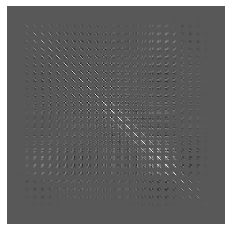

In [91]:
vectortoimg(C, 784)

# Check eigenvectors

In [92]:
# Check to make sure λ and V are correct by verifying the matrx equation CV - λV = 0
# Small values appear as expected
[max(abs(np.dot(C, V[0, :]) - λ[0] * V[0, :])), max(abs(np.dot(C, V[1, :]) - λ[1] * V[1, :]))]

[5.3660187404602766e-11, 5.4569682106375694e-11]

In [93]:
# Make sure thte two eigenvectors are unit vectors
[LA.norm(V[0, :]), LA.norm(V[1, :])]

[1.0000000000000002, 1.0000000000000007]

In [94]:
# Make sure the two eigenvectors are orthogonal
np.dot(V[0, :], V[1, :])

2.0296264668928643e-16

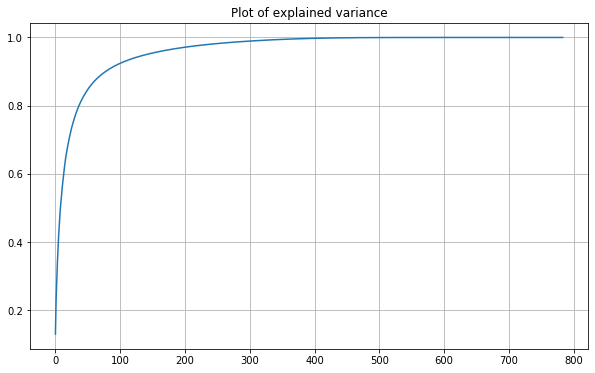

In [95]:
plt.figure(figsize = (10, 6))
plt.plot(np.arange(len(X[0])), np.cumsum(λ) / np.sum(λ))
plt.title("Plot of explained variance")
plt.grid(True)
plt.show()

# Dimension reduction

In [96]:
# Reconstruction using 1 component
Xrec1 = (np.dot(P[:, 0:1], V[0:1, :])) + mu
print(Xrec1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [97]:
# Reconstruction using 2 component
Xrec2 = (np.dot(P[:, 0:2], V[0:2, :])) + mu
print(Xrec2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [98]:
# Reconstruction using 3 component
Xrec3 = (np.dot(P[:, 0:3], V[0:3, :])) + mu
print(Xrec3)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [99]:
mu_T = mu.transpose()

mu_T.shape

(784,)

# 2-D Dimension

In [100]:
P_2D = np.dot(Z, V.T)
P_2D = P_2D[:, 0:2]
P_2D.shape

(11760, 2)

In [101]:
np.mean(P_2D, axis = 0)

array([-3.37870321e-14, -4.30458390e-14])

In [102]:
def count(x, count_n, count_p, label_n, label_p):
    
    for i in x:
        if i == label_n:
            count_n += 1
        if i == label_p:
            count_p += 1
    
    return [count_n, count_p]

In [103]:
count_label = count(T, 0, 0, label_n, label_p)
print("label_n, label_p = ", count_label)

label_n, label_p =  [5842, 5918]


In [104]:
def seperate(T, Y, Yn, Yp, N, label_n, label_p):
    
    for i in range(N):
        if T[i] == label_n:
            Yn.append(Y[i,:])
        if T[i] == label_p:
            Yp.append(Y[i,:])
            
    return Yn, Yp

In [105]:
P_2Dn, P_2Dp = seperate(T, P_2D, [], [], label_n+label_p, label_n, label_p)

In [106]:
P_2Dn = np.asarray(P_2Dn)
P_2Dp = np.asarray(P_2Dp)
P_2Dn_mean = np.mean(P_2Dn, axis = 0)
P_2Dp_mean = np.mean(P_2Dp, axis = 0)

P_2Dn_cov = np.cov(P_2Dn, rowvar = False)
P_2Dp_cov = np.cov(P_2Dp, rowvar = False)

print('P_2Dn:\n', P_2Dn)
print('P_2Dp:\n', P_2Dp)
print('P_2Dn_mean, P_2Dp_mean:\n', P_2Dn_mean, P_2Dp_mean)

P_2Dn:
 [[ 603.30920521  226.39033072]
 [ 239.05173975  582.24573029]
 [ 811.39289129 -110.4093358 ]
 [ 597.17452339  603.37704536]
 [ -36.06307395  740.76913129]]
P_2Dp:
 [[ -653.41858649  -353.97153439]
 [ -419.2385091    474.64477741]
 [ -560.34593296   -35.66165845]
 [-1089.42040303   209.59062875]
 [ -836.72481406  -103.68308296]]
P_2Dn_mean, P_2Dp_mean:
 [442.97305713 408.47458037] [-711.82964913   38.18382607]


# Create and See Histograms

In [107]:
preprocesscounts = lambda cn, cp: (label_n, cn/(cn + cp)) if cn > cp else ((label_p, cn/(cn + cp)) if cp > cn else (('Indeterminate', 0.5) if cp > 0 else ('Indeterminate', np.nan)))

In [108]:
def Build2DHistogramClassifier(X, T, B, xmin, xmax, label_n, label_p):
    
    Hn = np.zeros([B, B]).astype('int32');
    Hp = np.zeros([B, B]).astype('int32');
    
    binindices = (np.round(((B - 1) * (X - xmin) / (xmax - xmin)))).astype('int32');
    for i, x in enumerate(binindices):
        if T[i] == label_n:
            Hn[x[0], x[1]] += 1;
        else:
            Hp[x[0], x[1]] += 1;
            
    return [Hn, Hp]

In [109]:
def Apply2DHistogramClassifier(queries, Hn, Hp, xmin, xmax, label_n, label_p):
    
    B = np.alen(Hp);
    binindices = (np.round(((B - 1) * (queries - xmin) / (xmax - xmin)))).astype('int32');
    
    count_n = Hp[binindices[:, 0], binindices[:, 1]];
    count_p = Hn[binindices[:, 0], binindices[:, 1]];
    
    resultlabel = np.full(np.alen(binindices), "Indeterminate", dtype = object);
    resultprob = np.full(np.alen(binindices), np.nan, dtype = object);
    
    indices_n = count_n > count_p;
    indices_p = count_p > count_n;
    resultlabel[indices_n] = label_n;
    resultlabel[indices_p] = label_p;
    
    prob_n = count_n / (count_n + count_p);
    prob_p = count_p / (count_n + count_p);
    
    resultprob[indices_n] = prob_n[indices_n];
    resultprob[indices_p] = prob_p[indices_p];
    
    return [resultlabel, resultprob]

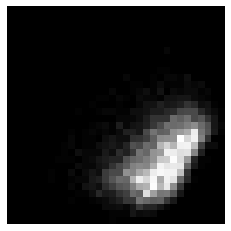

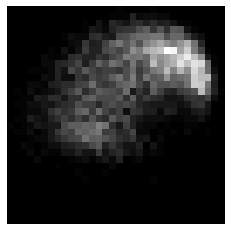

In [110]:
B = 32
# Getting min and max from data
xmin = np.amin(P_2D, axis = 0)
xmax = np.amax(P_2D, axis = 0)
[Hn, Hp] = Build2DHistogramClassifier(P_2D, T, B, xmin, xmax, label_n, label_p)

vectortoimg(Hn, B)
vectortoimg(Hp, B)

# Testing Data

In [111]:
XP, TP = load_mnist(dataset = "testing", selecteddigits = [label_p])
ZP = XP - mu
PP = np.dot(ZP, V.T)
PP = PP[:, 0:2]
RP = np.dot(PP, V[0:2, :])
XrecP = RP + mu

magic_nr, size, rows, cols 2051 10000 28 28
N 958


In [112]:
XN, TN = load_mnist(dataset = "testing", selecteddigits = [label_n])
ZN = XN - mu
PN = np.dot(ZN, V.T)
PN = PN[:, 0:2]
RN = np.dot(PN, V[0:2, :])
XrecN = RN + mu

magic_nr, size, rows, cols 2051 10000 28 28
N 982


# Apply Histogram Classifier

In [113]:
[resultlabelHp, resultprobHp] = Apply2DHistogramClassifier(PP[0:1, :], Hp, Hn, xmin, xmax, label_n, label_p)
[resultlabelHn, resultprobHn] = Apply2DHistogramClassifier(PN[0:1, :], Hp, Hn, xmin, xmax, label_n, label_p)

print(DataFrame([resultlabelHn, resultprobHn]).T)
print(DataFrame([resultlabelHp, resultprobHp]).T)

     0    1
0  4.0  1.0
     0         1
0  6.0  0.583333


# Baysian Classifier

In [114]:
def Build2DBayesianClassifer(X, T, label_n, label_p):
    
    mu_n = np.mean(X[T == label_n],axis = 0)
    mu_p = np.mean(X[T == label_p],axis = 0)
    
    sigma_n = np.cov(X[T == label_n], rowvar = False)
    sigma_p = np.cov(X[T == label_p], rowvar = False)
    
    Nn = len(T[T == label_n])
    Np = len(T[T == label_p])

    return[[mu_n, sigma_n, Nn], [mu_p, sigma_p, Np]]

In [115]:
def pdf(x, mu, sigma):
    
    d = np.alen(mu)
    dfact1 = (2 * np.pi) ** d
    dfact2 = np.linalg.det(sigma)
    
    fact = 1 / np.sqrt(dfact1 * dfact2)
    
    xc = x - mu
    isigma = np.linalg.inv(sigma)
    
    return fact * np.exp(-0.5 * np.einsum('ij,jk,ik->i', xc, isigma, xc))

In [116]:
def Apply2DBayesianClassifer(queries, mu_n, mu_p, sigma_n, sigma_p, Nn, Np, label_n, label_p):
    
    A = 1
    
    count_n = Nn * A * pdf(queries, mu_n, sigma_n)
    count_p = Np * A * pdf(queries, mu_p, sigma_p)
        
    resultlabel = np.full(np.alen(queries), "Indeterminate", dtype = object);
    
    resultprob = np.full(np.alen(queries), np.nan, dtype = object);
    
    indices_n = count_n > count_p;
    indices_p = count_p > count_n;
    
    resultlabel[indices_n] = label_n;   
    resultlabel[indices_p] = label_p;
    
    prob_n = count_n / (count_p + count_n);
    prob_p = count_p / (count_p + count_n);
    
    resultprob[indices_n] = prob_n[indices_n];
    resultprob[indices_p] = prob_p[indices_p];
    
    return resultlabel, resultprob

In [117]:
[resultlabelBp, resultprobBp] = Apply2DBayesianClassifer(PP[0:1, :], P_2Dn_mean, P_2Dp_mean, P_2Dn_cov, P_2Dp_cov, count_label[0], count_label[1], label_p, label_n)
[resultlabelBn, resultprobBn] = Apply2DBayesianClassifer(PN[0:1, :], P_2Dn_mean, P_2Dp_mean, P_2Dn_cov, P_2Dp_cov, count_label[0], count_label[1], label_p, label_n)

print(DataFrame([resultlabelBp, resultprobBp]).T)
print("")
print(DataFrame([resultlabelBn, resultprobBn]).T)


     0         1
0  4.0  0.976869

     0    1
0  6.0  1.0


In [118]:
PP_test = PP[0:20, :]
PN_test = PN[0:20, :]

In [119]:
[resultlabelHp1, resultprobHp1] = Apply2DHistogramClassifier(PP_test, Hp, Hn, xmin, xmax, label_p, label_n)
[resultlabelHn1, resultprobHn1] = Apply2DHistogramClassifier(PN_test, Hp, Hn, xmin, xmax, label_p, label_n)

print(DataFrame([resultlabelHp1, resultprobHp1]).T)
print("")
print(DataFrame([resultlabelHn1, resultprobHn1]).T)



                0         1
0               4  0.583333
1               4  0.833333
2               4  0.583333
3               4         1
4               6  0.636364
5               4  0.583333
6               4         1
7               4         1
8               4         1
9               4  0.888889
10              4  0.666667
11              4         1
12              4         1
13              4         1
14              4         1
15              4         1
16              4  0.909091
17              4         1
18  Indeterminate       NaN
19              4         1

                0         1
0               6         1
1               6         1
2               6         1
3               6         1
4               6         1
5               4  0.928571
6               6         1
7               6         1
8               6         1
9               6         1
10              6  0.958333
11              6         1
12              6         1
13              6  

In [120]:
accuracyH = (resultprobHp + resultprobHn) / 2
print(accuracyH)

[0.7916666666666667]


In [121]:
accuracyB = (resultprobBp + resultprobBn) / 2
print(accuracyB)

[0.9884345518771094]


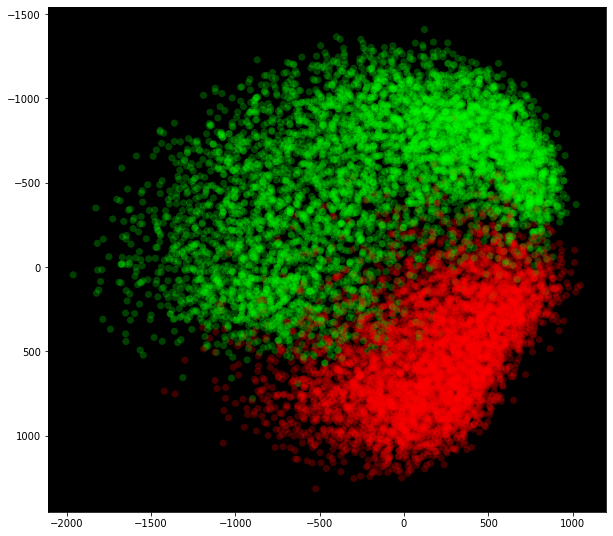

In [122]:
randomorder = np.arange(len(T))
# Set colors
opacity = 0.25
cols = np.zeros((len(T), 4))     # Initialize matrix to hold colors
cols[T[ : ,0] == label_n] = [1, 0, 0, opacity] # Negative points are red (with opacity 0.25)
cols[T[ : ,0] == label_p] = [0, 1, 0, opacity] # Positive points are green (with opacity 0.25)

# Draw scatter plot
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, facecolor = 'black')
ax.scatter(P[randomorder, 1], P[randomorder, 0], s = 50, linewidths = 0, facecolors = cols[randomorder, :], marker = "o");
ax.set_aspect('equal')

plt.gca().invert_yaxis()
plt.show()

# PCA using sklearn

In [123]:
from sklearn.decomposition import PCA

In [124]:
pca = PCA(n_components = 2)
Psk = pca.fit_transform(X)
Psk.shape

(11760, 2)

In [125]:
Xrecsk = pca.inverse_transform(Psk)
Xrecsk.shape

(11760, 784)

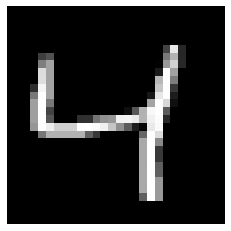

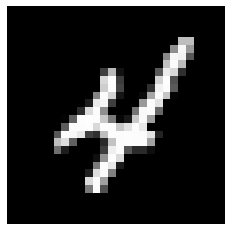

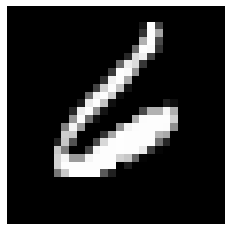

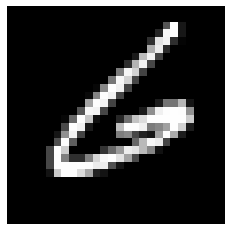

In [126]:
# From first principles
vectortoimg(Xrec[0], 28)
vectortoimg(Xrec[1], 28)
vectortoimg(Xrec[-2], 28)
vectortoimg(Xrec[-3], 28)

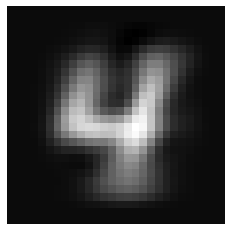

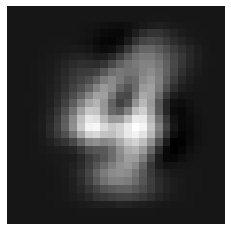

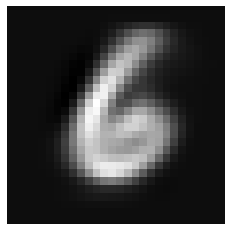

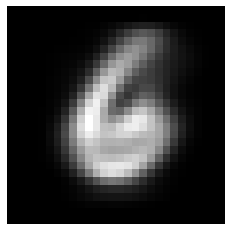

In [127]:
# Using sklearn
vectortoimg(Xrecsk[0], 28)
vectortoimg(Xrecsk[1], 28)
vectortoimg(Xrecsk[-2], 28)
vectortoimg(Xrecsk[-3], 28)

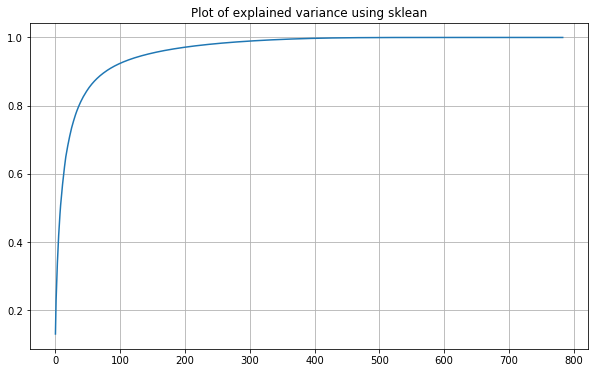

In [128]:
pcafull = PCA()
Pskfull = pcafull.fit_transform(X)
λskfull = pcafull.explained_variance_
plt.figure(figsize = (10, 6))
plt.plot(np.arange(len(X[0])), np.cumsum(λskfull) / np.sum(λskfull))
plt.title('Plot of explained variance using sklean')
plt.grid(True)
plt.show()